In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 

In [27]:
# define parameters and functions:
alpha = .5
epsilon = .1
L = 2*np.pi
Ma = 1
tol = 0.0001

In [28]:
def RHS(t,S):
    N = len(S)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    #print(np.min(S), np.max(S))
    
    p = 1/S - epsilon**2*fft.ifft(n**2*(2*np.pi/L*1j)**2*fft.fft(S)) -1/S**2*Ma 
    
    p_z = fft.ifft(n*(2*np.pi/L*1j)*fft.fft(p))
    
    factor = 2*S**2*(alpha**2 - S**2 + 2*S**2*np.log(S/alpha)) - (alpha**2 - S**2)**2
    
    dSdt = fft.ifft(n*2*np.pi/L*1j*fft.fft((p_z - 1)*factor)).real/3/S/16 #(S^2)_t

    return dSdt


7
(300, 200)


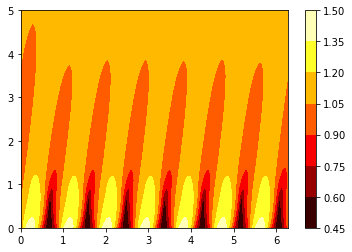

In [29]:
T = 5
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(0, 2*np.pi, 300)
t = np.linspace(0,T, 200)
t_span = (0,T)
u0 = (1 + np.sin(z*k)*0.95)*(1-alpha)+alpha

result_ivp = scipy.integrate.solve_ivp(RHS, t_span, u0, 'BDF', atol = 1e-15, t_eval =t)
u = result_ivp.y
print(np.shape(u))
Z,T = np.meshgrid(z,t)
plt.contourf(Z,T,u.T, cmap ='hot')
plt.colorbar()

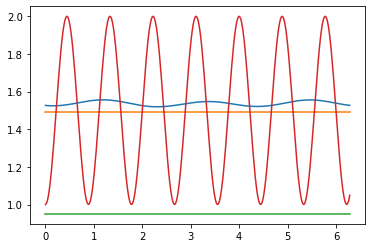

In [211]:
plt.plot(z, u[:,-1])
plt.plot(z, np.ones_like(z)*np.mean(u0))
plt.plot(z, np.ones_like(z)*alpha)
plt.plot(z, u0)

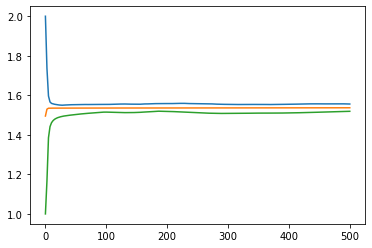

In [212]:
plt.plot(t, np.max(u, axis = 0))
plt.plot(t, np.trapz(u,z, axis = 0)/2/np.pi)
plt.plot(t, np.min(u, axis = 0))

In [165]:
# give list of Mas
Ma_list = np.linspace(0.52, 0.47, 10)

alpha = .95
epsilon = .1
L = 2*np.pi

max_list = np.zeros_like(Ma_list)
mean_list = np.zeros_like(Ma_list)

T = 500
k = 1/np.sqrt(2)/epsilon
z = np.linspace(0, 2*np.pi, 200)
t = np.linspace(0,T, 100)
t_span = (0,T)
u0 = (1.1 - np.cos(z*k))/2 + alpha
last_u = (1.1 - np.cos(z*k))/2 + alpha

for j,Ma in enumerate(Ma_list):
    def RHS(t,S):
        N = len(S)
        n = np.arange(N);
        n[int(N/2)+1:] -= N
        p = 1/S - epsilon**2*fft.ifft(n**2*(2*np.pi/L*1j)**2*fft.fft(S)) -1/S**2*Ma
        p_z = fft.ifft(n*(2*np.pi/L*1j)*fft.fft(p))
        factor = 2*S**2*(alpha**2 - S**2 + 2*S**2*np.log(S/alpha)) - (alpha**2 - S**2)**2 
        dSdt = fft.ifft(n*2*np.pi/L*1j*fft.fft((p_z - 1)*factor)).real/3/S/16 #(S^2)_t
        #print(np.min(S), np.max(S))
        return dSdt
     
    u0 = last_u
    result_ivp = scipy.integrate.solve_ivp(RHS, t_span, u0, 'BDF', atol = 1e-9, t_eval =t)
    u = result_ivp.y
    max_list[j] = np.max(u[:,-1])
    mean_list[j] = np.mean(u[:,-1])
    last_u = u[:,-1]
    print(j)

0


KeyboardInterrupt: 

In [ ]:
plt.plot(Ma_list, max_list)
plt.plot(Ma_list, mean_list)

In [261]:
Ma = 0.2
epsilon = 0.05

In [262]:
# simple equation
def RHS_simple(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(n*1j*np.pi*2/L*fft.fft(eta))
    eta_zzz = fft.ifft((n*1j*np.pi*2/L)**3*fft.fft(eta))
    return -fft.ifft(n*1j*2*np.pi/L*fft.fft(eta**3*(1+(1-2*Ma)*eta_z+epsilon**2*eta_zzz))).real


14.14213562373095
(200, 200)


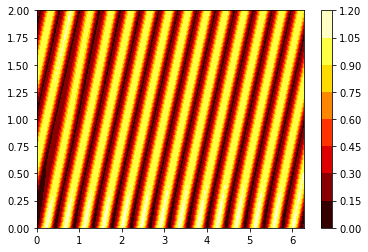

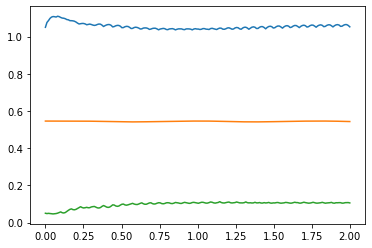

In [263]:
T = 2
k = 1/np.sqrt(2)/epsilon
print(k)
z = np.linspace(0, 2*np.pi, 200)
t = np.linspace(0,T, 200)
t_span = (0,T)
u0 = (1.1 - np.cos(z*k))/2 
result_ivp = scipy.integrate.solve_ivp(RHS_simple, t_span, u0, 'BDF', atol = 1e-15, t_eval =t)
u = result_ivp.y
print(np.shape(u))
Z,T = np.meshgrid(z,t)
plt.contourf(Z,T,u.T, cmap ='hot')
plt.colorbar()
plt.show()
plt.plot(t, np.max(u, axis = 0))
plt.plot(t, np.trapz(u,z, axis = 0)/2/np.pi)
plt.plot(t, np.min(u, axis = 0))

7
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
ups
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1
Done here, Ma = 1


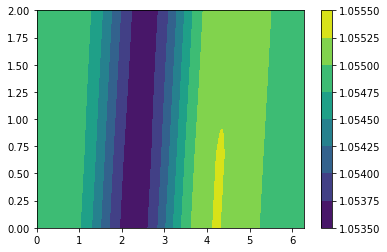

In [45]:
import numpy as np
import scipy.linalg
import scipy.integrate
from scipy import fft
import matplotlib.pyplot as plt



# define parameters and functions:
alpha = .5
epsilon = .1
L = 2*np.pi
tol = 1e-5

D_list = np.linspace(0, .1, 10)


T = 2
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(0, 2*np.pi, 300)
t = np.linspace(0,T, 50)
t_span = (0,T)
u0 = (1 + np.sin(z*k)*0.95)*(1-alpha)+alpha

results = np.zeros((len(z), len(D_list)))
N = len(z)
n = np.arange(N)
n[int(N/2)+1:] -= N
for j, D in enumerate(D_list):
    def RHS(t,S):
        Ma = (1-D)/2
        p = 1/S - epsilon**2*fft.ifft(n**2*(2*np.pi/L*1j)**2*fft.fft(S)) -1/S**2*Ma 
        p_z = fft.ifft(n*(2*np.pi/L*1j)*fft.fft(p))
        factor = 2*S**2*(alpha**2 - S**2 + 2*S**2*np.log(S/alpha)) - (alpha**2 - S**2)**2
        dSdt = fft.ifft(n*2*np.pi/L*1j*fft.fft((p_z - 1)*factor)).real/3/S/16 #(S^2)_t

        return dSdt
    result_ivp = scipy.integrate.solve_ivp(RHS, t_span, u0, 'BDF', atol = 1e-7, t_eval =t)
    u = result_ivp.y
    while np.max(u[:,-1]-u[:, np.shape(u)[-1]-2]) > tol:
        print('ups')
        result_ivp = scipy.integrate.solve_ivp(RHS, t_span, u[:,-1], 'BDF', atol = 1e-7, t_eval =t)
        u = result_ivp.y

    results[:,j] = u[:,-1]
    print(f'Done here, Ma = {Ma}')
    u0 = u[:,-1]

Z,T = np.meshgrid(z,t)
plt.figure()
plt.contourf(Z,T,u.T)
plt.colorbar()
plt.show()

array([[1.05490937, 1.05490895, 1.05490853, ..., 1.05489858, 1.05489844,
        1.0548983 ],
       [1.05491119, 1.05491076, 1.05491032, ..., 1.05489902, 1.05489885,
        1.05489868],
       [1.05491308, 1.05491262, 1.05491217, ..., 1.05489961, 1.0548994 ,
        1.0548992 ],
       ...,
       [1.05490436, 1.05490401, 1.05490366, ..., 1.05489811, 1.05489808,
        1.05489805],
       [1.05490594, 1.05490557, 1.05490519, ..., 1.05489812, 1.05489805,
        1.05489798],
       [1.05490762, 1.05490722, 1.05490682, ..., 1.05489827, 1.05489817,
        1.05489806]])

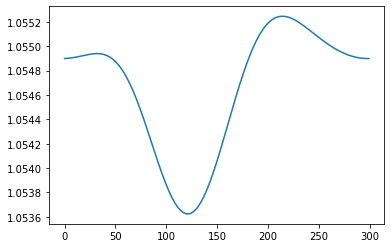

In [46]:
plt.plot(results[:,-1])
u

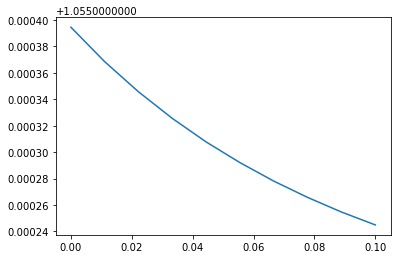

In [47]:
plt.plot(D_list, np.max(results, axis=0))